## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
import torch
print("Torch version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())

import ultralytics
print("Ultralytics version:", ultralytics.__version__)

import roboflow
print("Roboflow version:", roboflow.__version__)


Torch version: 2.4.1+cu121
CUDA Available: True
Ultralytics version: 8.3.69
Roboflow version: 1.1.51


In [2]:
!nvidia-smi

Thu Jan 30 13:51:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  |   00000000:01:00.0  On |                  Off |
| 32%   40C    P8              9W /  450W |     567MiB /  24564MiB |     10%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


In [4]:
import torch
print(torch.__version__)  # Check PyTorch version
print(torch.version.cuda)  # Check CUDA version used by PyTorch
print(torch.backends.cudnn.version())  # Check cuDNN version
print(torch.cuda.is_available())  # Check if CUDA is available
print(torch.cuda.device_count())


2.4.1+cu121
12.1
90100
True
1


## Imports

In [5]:
from roboflow import Roboflow
# from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="VCevAEcFL0sYcXK3HkUv")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(12)
dataset = version.download("yolov11")
                
                

The syntax of the command is incorrect.


[WinError 2] The system cannot find the file specified: 'c:\\Users\\aimlc\\OneDrive\\Desktop\\PESU_ITTIAM\\CAP/datasets'
c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-12 in yolov11:: 100%|██████████| 756/756 [00:00<00:00, 3233.21it/s]


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.



In [14]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.


## Custom training

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11m.pt data="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\data.yaml" batch=6 epochs=25 imgsz=1280 plots=True device=0 verbose=True project="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results" name="football_training_b6_e25_s"

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP
Ultralytics 8.3.69 🚀 Python-3.8.8 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\data.yaml, epochs=25, time=None, patience=100, batch=6, imgsz=1280, save=True, save_period=-1, cache=False, device=0, workers=8, project=C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results, name=football_training_b6_e25_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, 


train: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\train\labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]
train: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\train\labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]

val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]
       1/25       6.7G      1.235      4.552      1.031        237       1280:   0%|          | 0/50 [00:00<?, ?it/s]
       1/25       6.7G      1.235      4.552      1.031        237

In [21]:
!ls {HOME}/runs/detect/train/

'ls' is not recognized as an internal or external command,
operable program or batch file.


c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


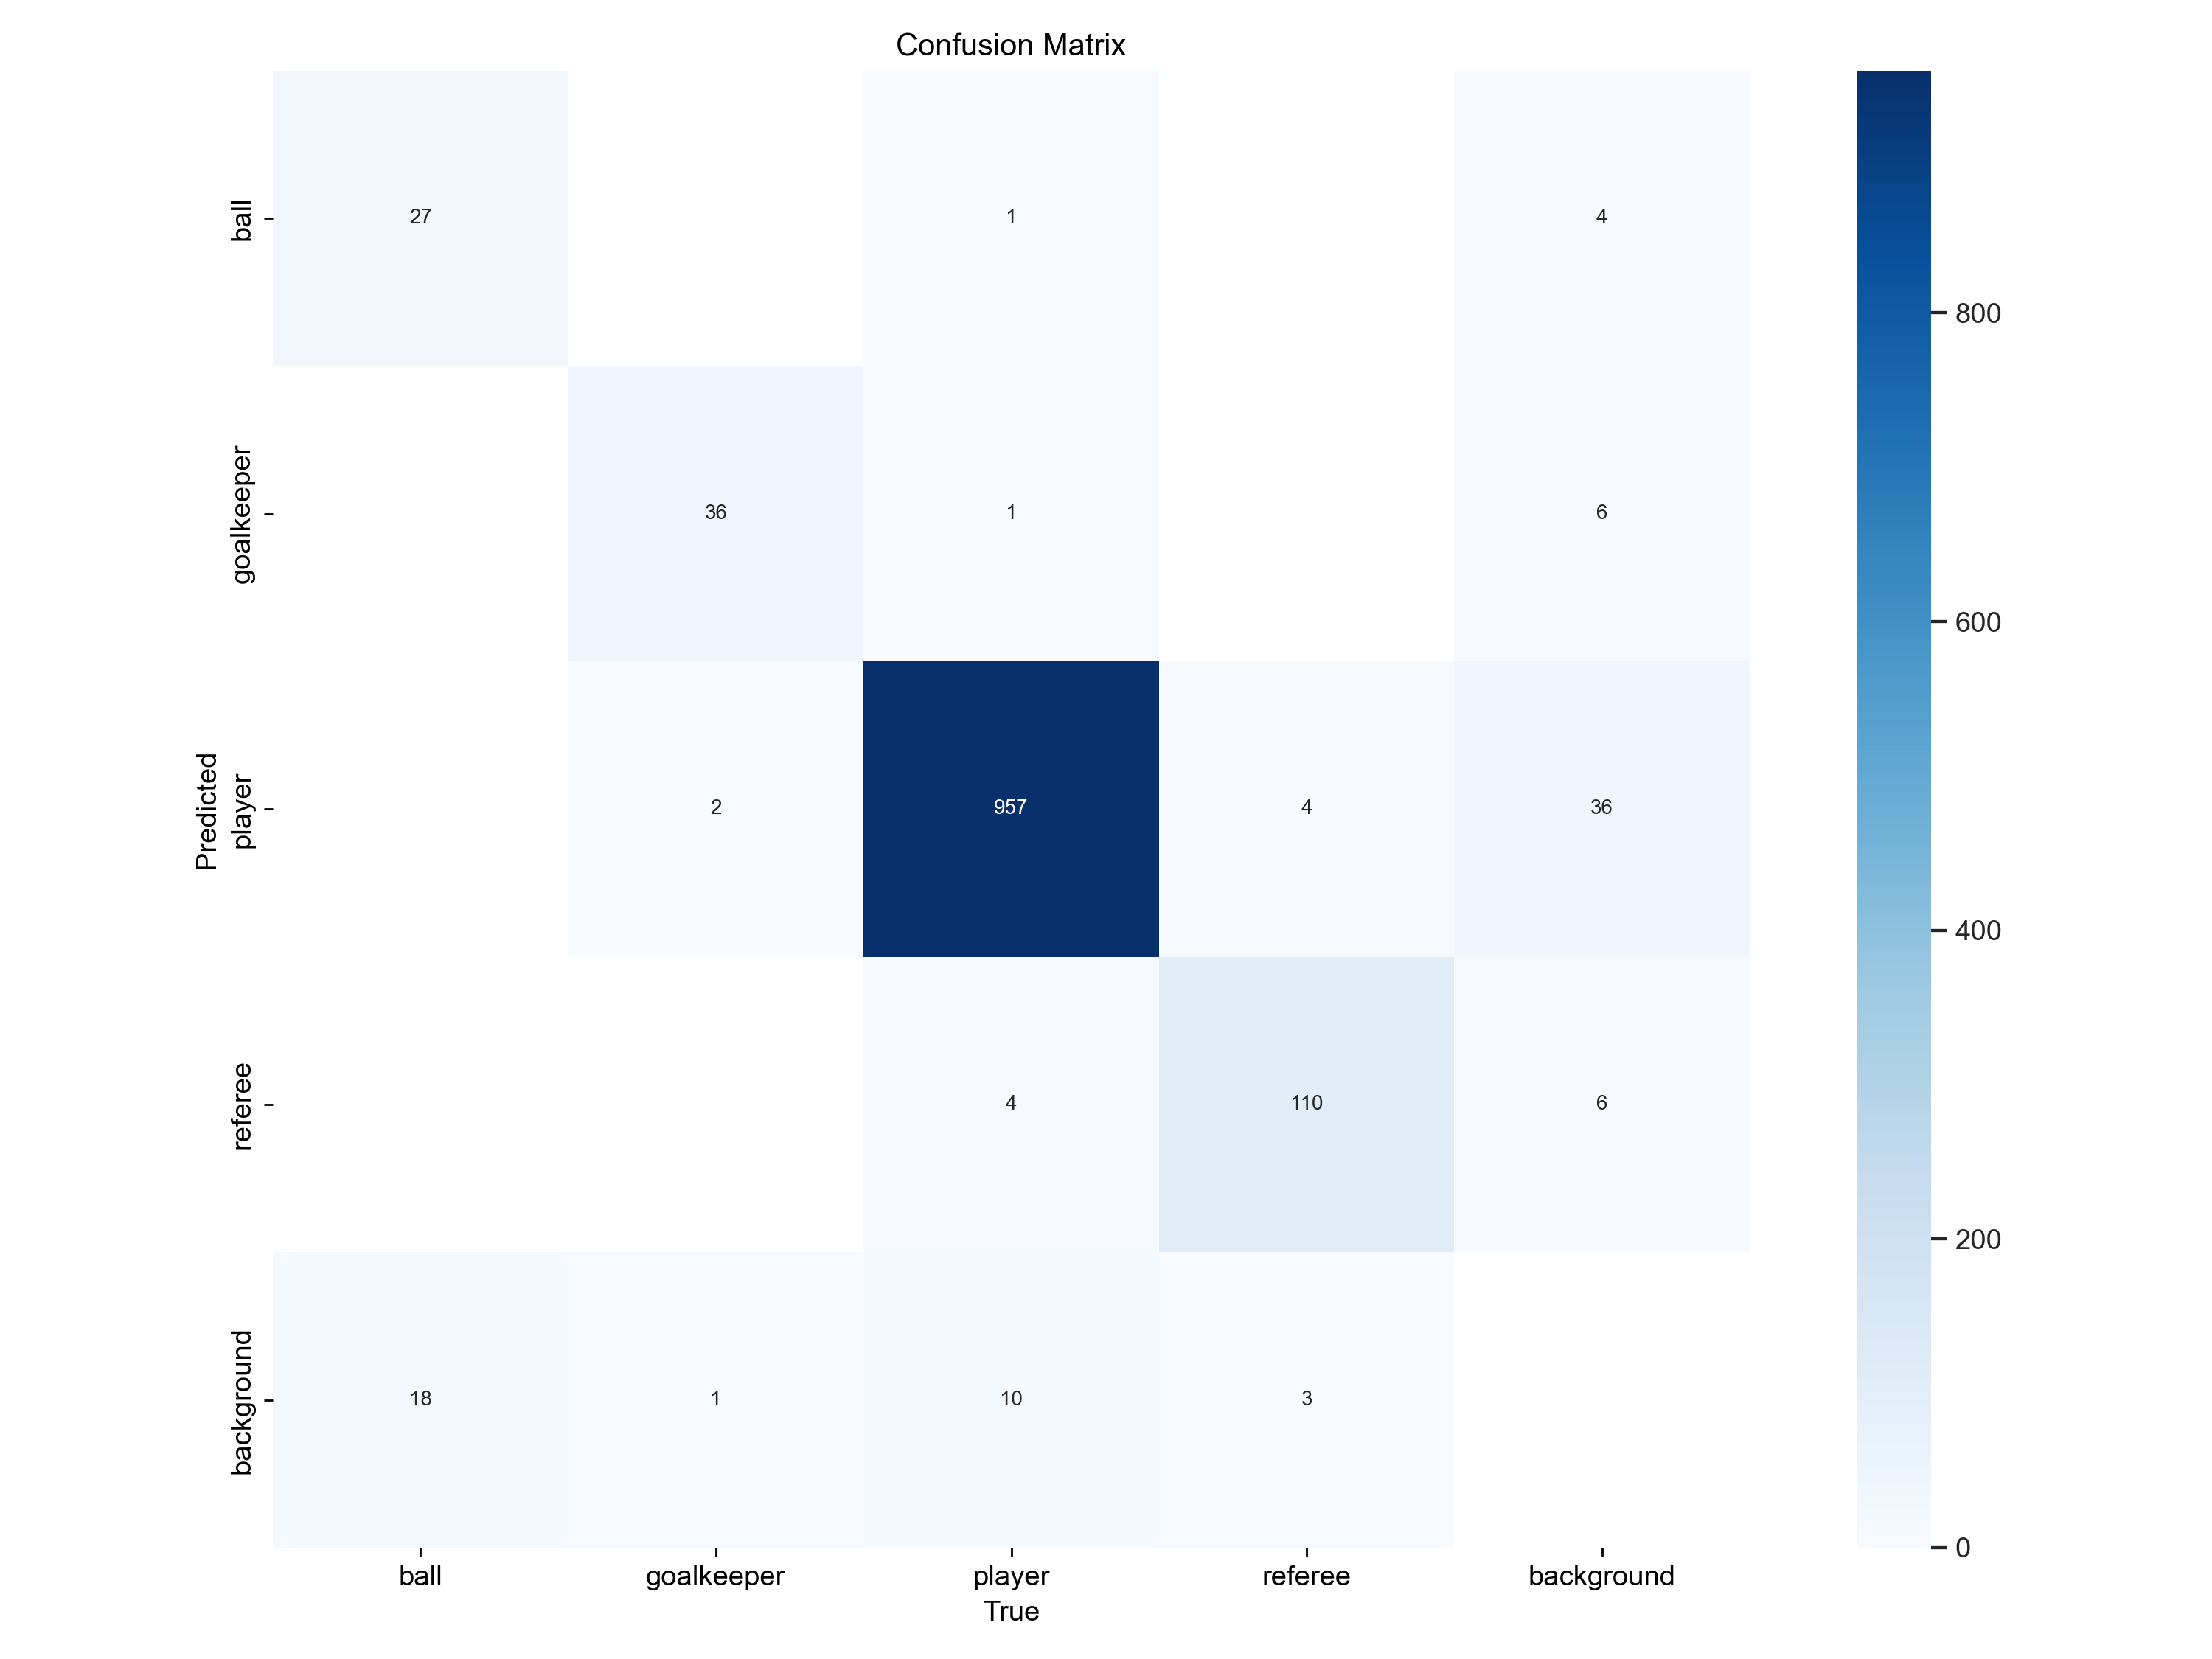

In [22]:
%cd {HOME}
Image(filename=r'C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results\football_training_b6_e25_s\confusion_matrix.png', width=600)

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


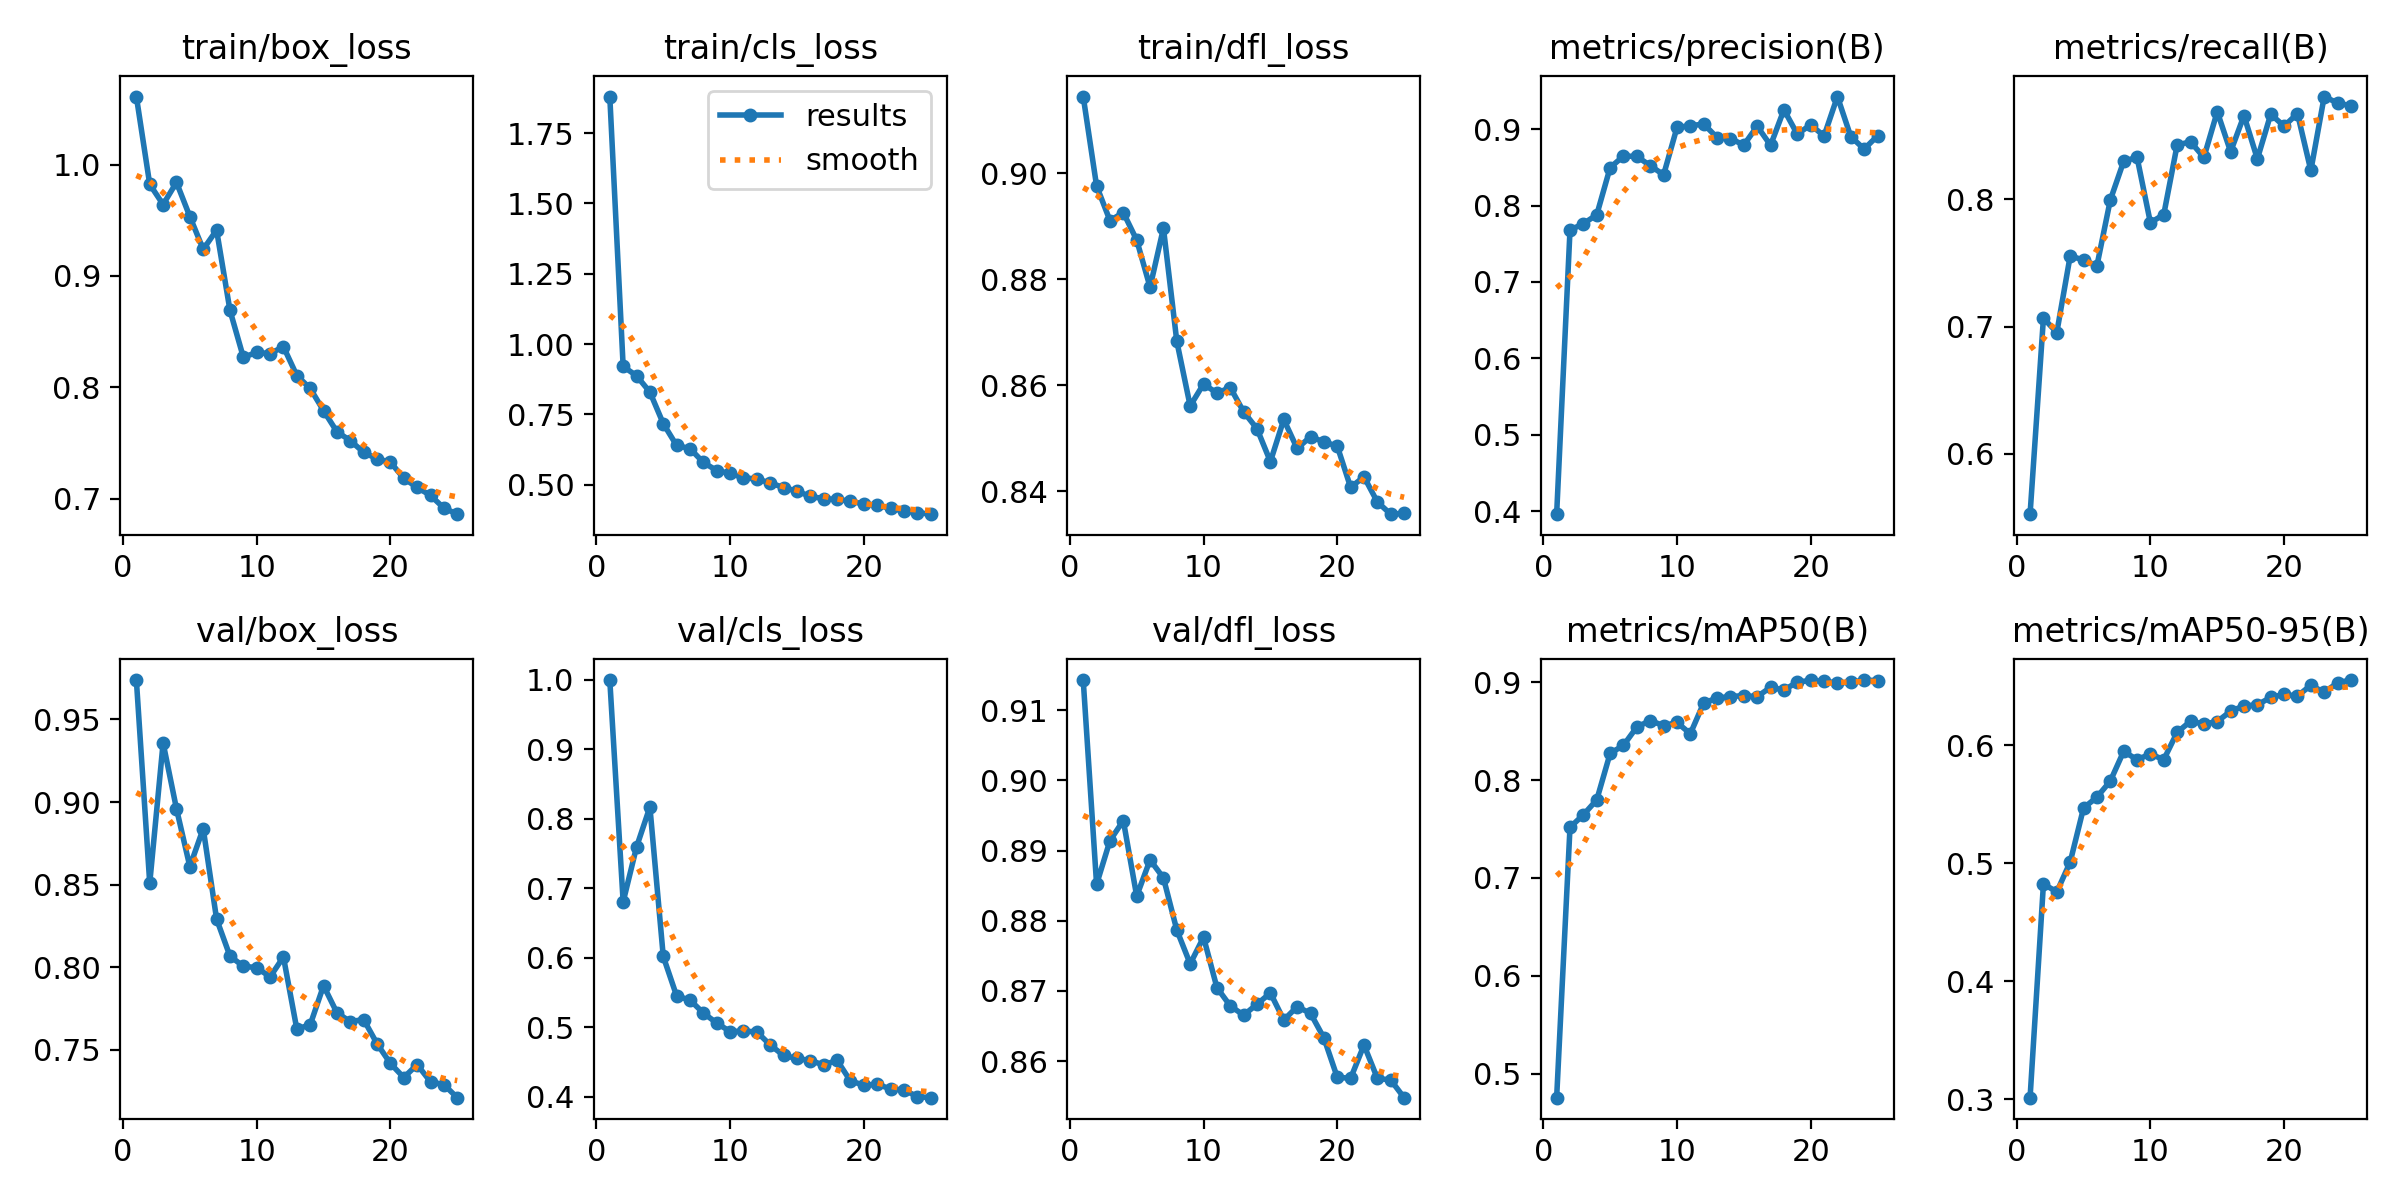

In [23]:
%cd {HOME}
Image(filename=r'Results/football_training_b6_e25_s/results.png', width=600)

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


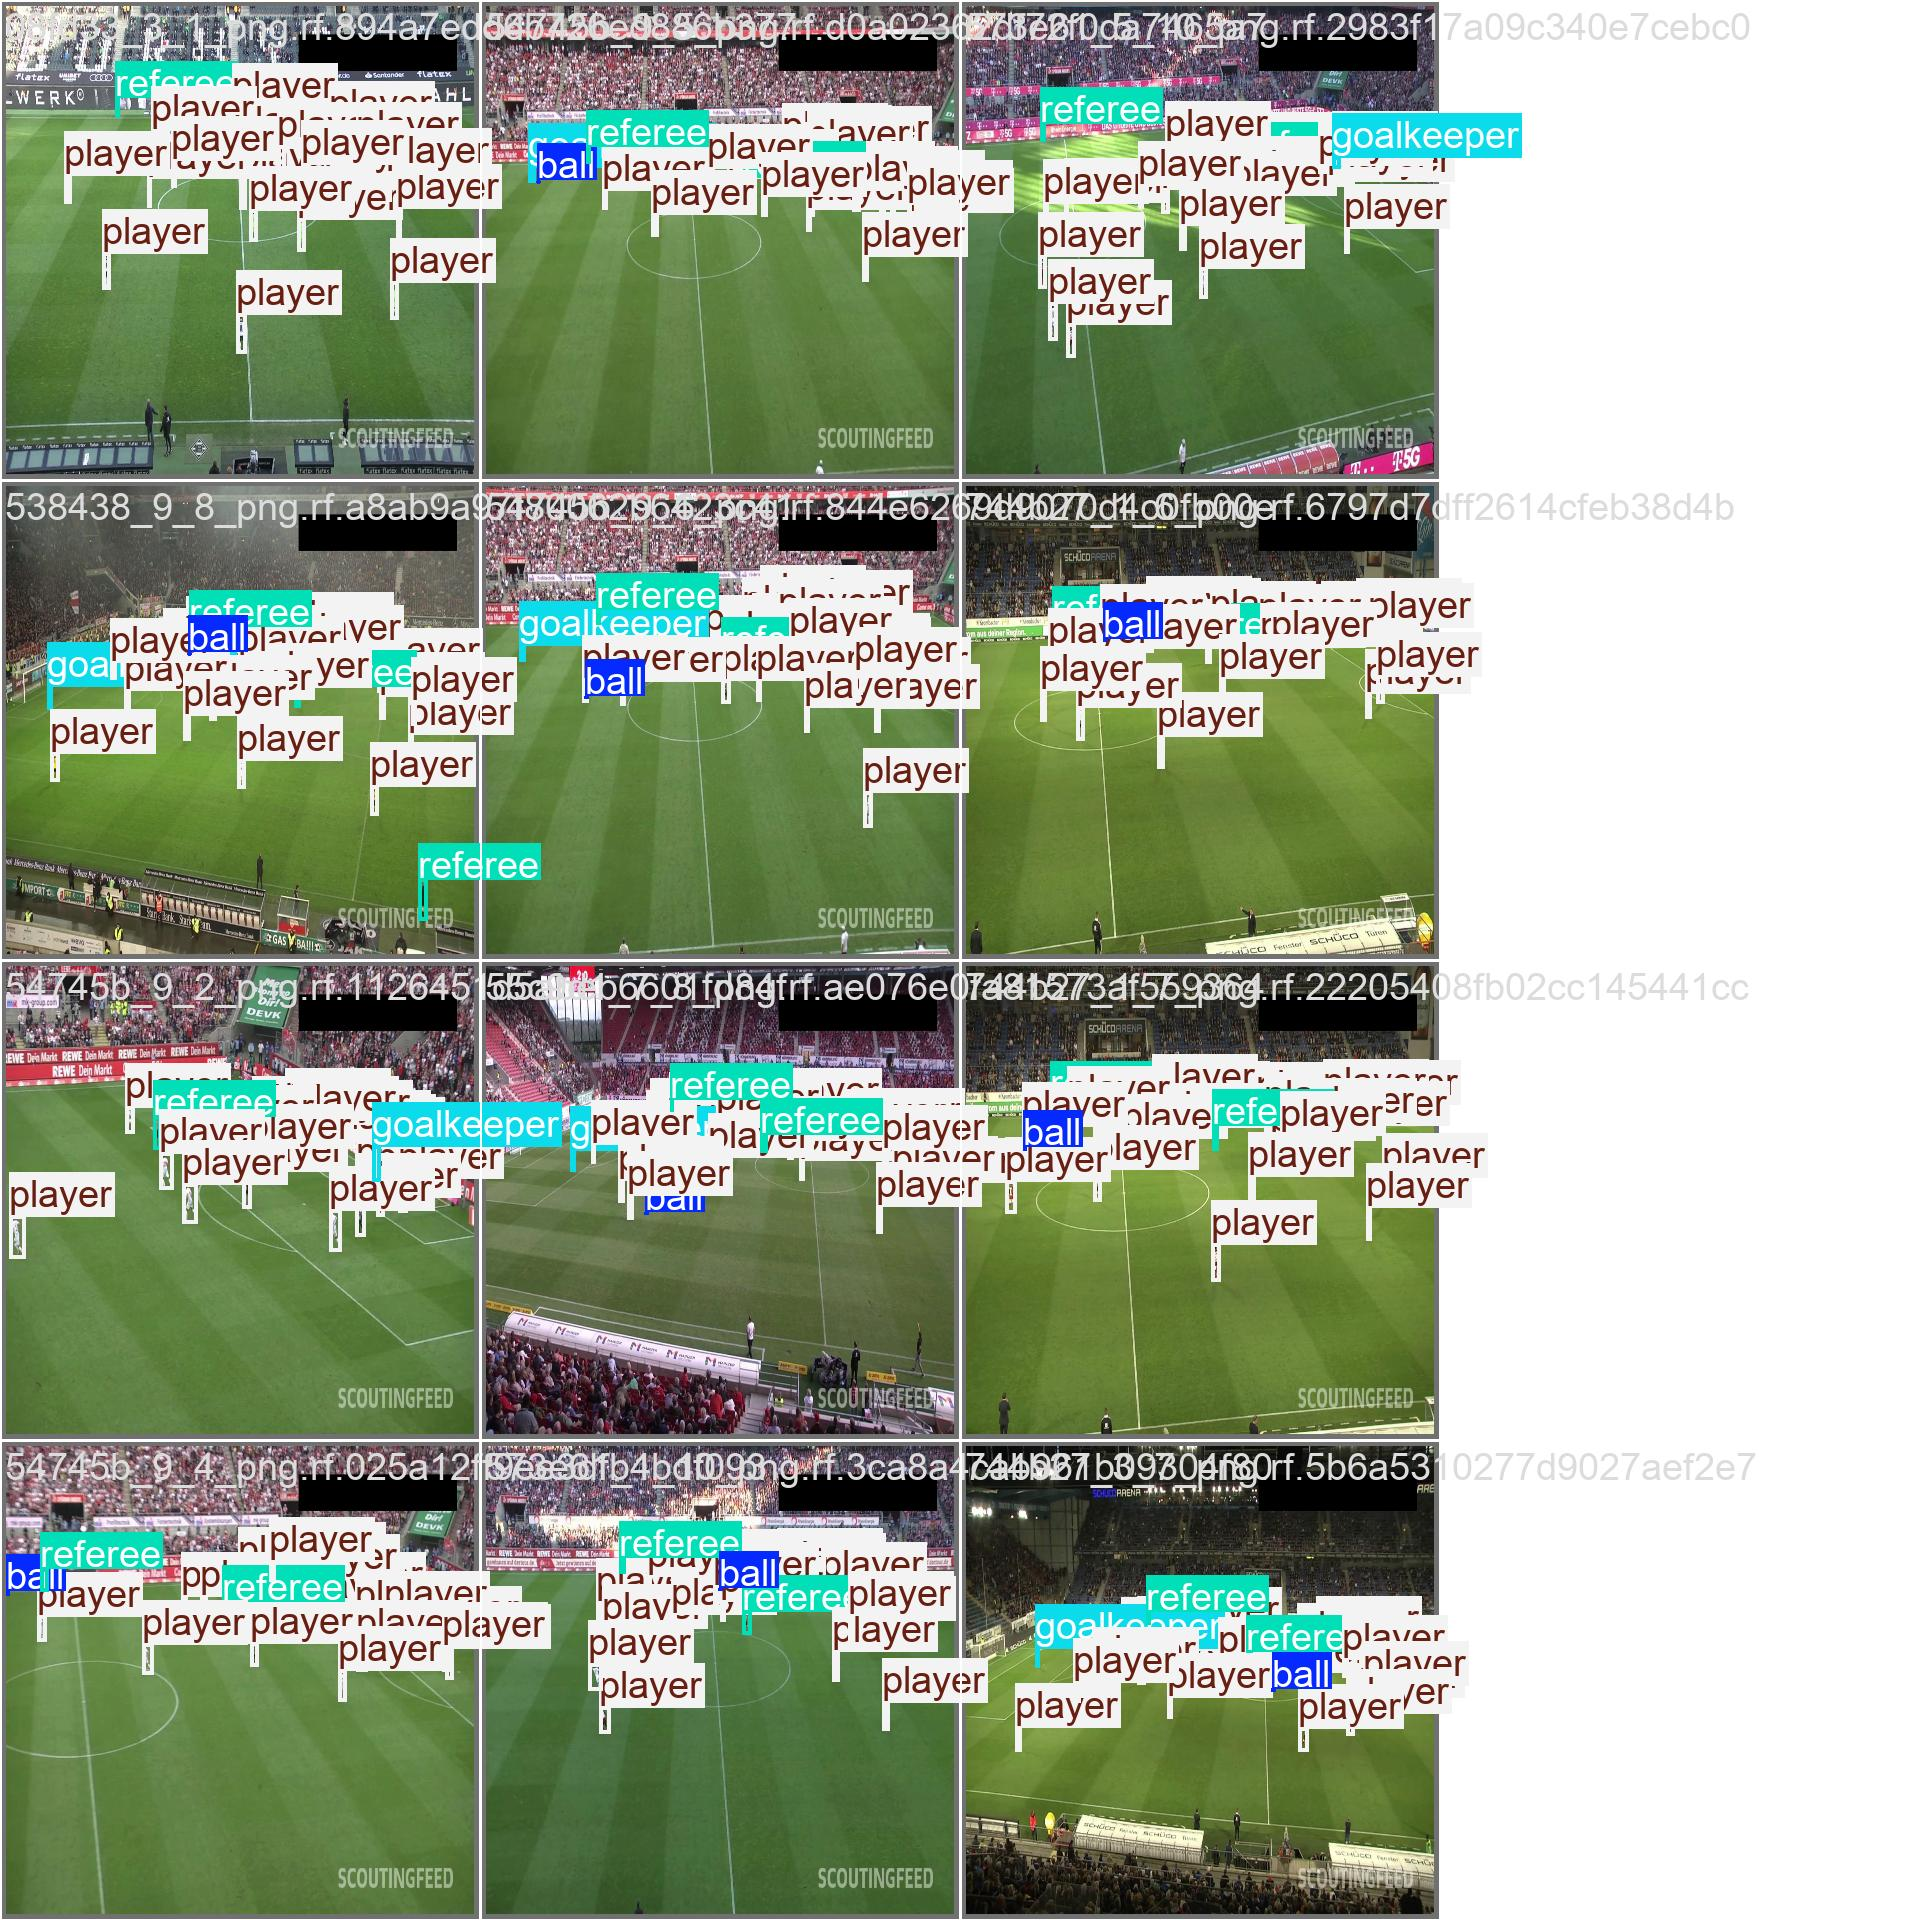

In [24]:
%cd {HOME}
Image(filename=r'Results/football_training_b6_e25_s/val_batch0_labels.jpg', width=600)

## Validate custom model

In [20]:
%cd {HOME}

!yolo task=detect mode=val model="Results/football_training_b6_e25_s/weights/best.pt" data="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\data.yaml" imgsz=1280

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP
Ultralytics 8.3.69 🚀 Python-3.8.8 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
                   all         49       1174      0.906      0.873      0.905      0.662
                  ball         45         45      0.881        0.6       0.69      0.326
            goalkeeper         38         39      0.853      0.949      0.958      0.764
                player         49        973      0.962      0.988      0.994      0.843
               referee         49        117      0.927      0.957      0.979      0.716
Speed: 5.1ms preprocess, 9.0ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to d:\adithya\runs\detect\val4
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-players-detection-12\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:02<00:06,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:02<00:02,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:03<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  m